<a href="https://colab.research.google.com/github/biybiyy29-lgtm/UTS.PCD-23423015-/blob/main/UTS_PCD_(23423015).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Soal nomor 1


In [6]:
from google.colab import files
uploaded = files.upload()


Saving 84a1e325d1598ae67a91afb54c4392bf.jpg to 84a1e325d1598ae67a91afb54c4392bf.jpg


In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math


In [15]:
# Baca gambar dan ubah ke grayscale
img = cv2.imread('84a1e325d1598ae67a91afb54c4392bf.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [16]:
# Transformasi Negatif
negatif = 255 - gray

# Transformasi Logaritmik
c = 255 / np.log(1 + np.max(gray))
log_transform = c * np.log(1 + gray.astype(np.float64))
log_transform = np.array(log_transform, dtype=np.uint8)


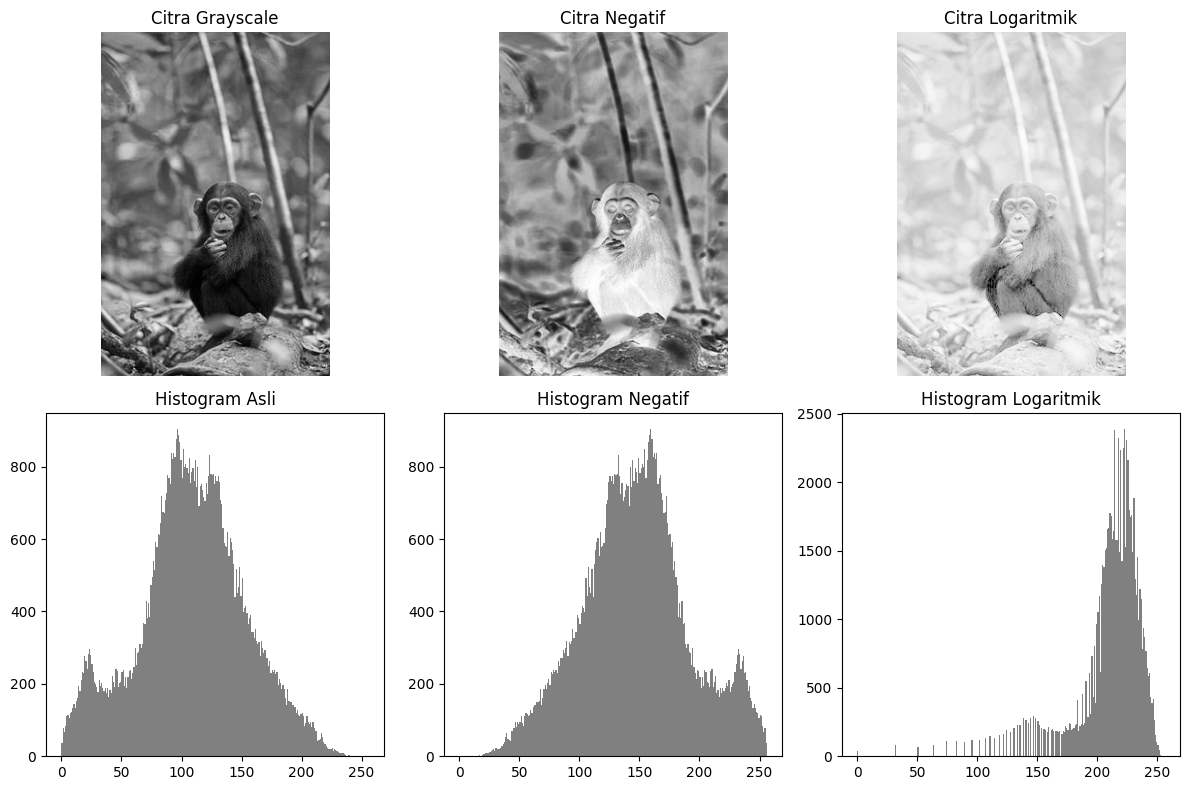

In [17]:
plt.figure(figsize=(12,8))

# Citra Asli
plt.subplot(2,3,1)
plt.imshow(gray, cmap='gray')
plt.title('Citra Grayscale')
plt.axis('off')

# Citra Negatif
plt.subplot(2,3,2)
plt.imshow(negatif, cmap='gray')
plt.title('Citra Negatif')
plt.axis('off')

# Citra Logaritmik
plt.subplot(2,3,3)
plt.imshow(log_transform, cmap='gray')
plt.title('Citra Logaritmik')
plt.axis('off')

# Histogram Asli
plt.subplot(2,3,4)
plt.hist(gray.ravel(), bins=256, range=[0,256], color='gray')
plt.title('Histogram Asli')

# Histogram Negatif
plt.subplot(2,3,5)
plt.hist(negatif.ravel(), bins=256, range=[0,256], color='gray')
plt.title('Histogram Negatif')

# Histogram Logaritmik
plt.subplot(2,3,6)
plt.hist(log_transform.ravel(), bins=256, range=[0,256], color='gray')
plt.title('Histogram Logaritmik')

plt.tight_layout()
plt.show()


**Analisa Nomor 1:**


*   **Citra Asli** : Nilai keabuan mengikuti intensitas asli dari gambar. Pada foto ini, bagian latar belakang hutan mungkin memiliki banyak variasi keabuan, sementara objek utama (simpanse) didominasi nilai gelap.

*   **Citra Negatif** : Nilai keabuan dibalik. Area yang awalnya gelap menjadi terang, dan sebaliknya. Histogram-nya akan tampak seperti pantulan horizontal dari histogram citra asli.

*   **Citra Logaritmik** : Menonjolkan detail pada area gelap (intensitas rendah). Area gelap menjadi lebih terang, tapi area terang tidak berubah banyak. Histogram-nya cenderung melebar ke arah intensitas tinggi (terang).

**Kapan Transformasi Logaritmik Lebih Bermanfaat?**
Transformasi logaritmik lebih bermanfaat ketika:

*   Citra memiliki banyak informasi di area gelap yang sulit terlihat.
*   Digunakan untuk meningkatkan kontras bagian gelap tanpa terlalu mencerahkan area terang. *Contoh: citra medis, astronomi, atau citra objek di lingkungan minim cahaya.*

Sedangkan transformasi negatif berguna jika:

*   Ingin membalikkan kontras visual untuk analisis bentuk/tepi,
*   Atau untuk menghasilkan efek kebalikan seperti pada film negatif.

# Soal Nomor 2

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 84a1e325d1598ae67a91afb54c4392bf.jpg to 84a1e325d1598ae67a91afb54c4392bf (1).jpg


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Baca gambar dan ubah menjadi grayscale
img = cv2.imread('84a1e325d1598ae67a91afb54c4392bf.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [ ]:
# Definisi tiga kernel
LPF = (1/9) * np.array([[1,1,1],
                        [1,1,1],
                        [1,1,1]])

HPF = np.array([[-1,-1,-1],
                [-1, 8,-1],
                [-1,-1,-1]])

BPF = np.array([[0,-1,0],
                [-1,5,-1],
                [0,-1,0]])

# Terapkan konvolusi
lpf_result = cv2.filter2D(gray, -1, LPF)
hpf_result = cv2.filter2D(gray, -1, HPF)
bpf_result = cv2.filter2D(gray, -1, BPF)


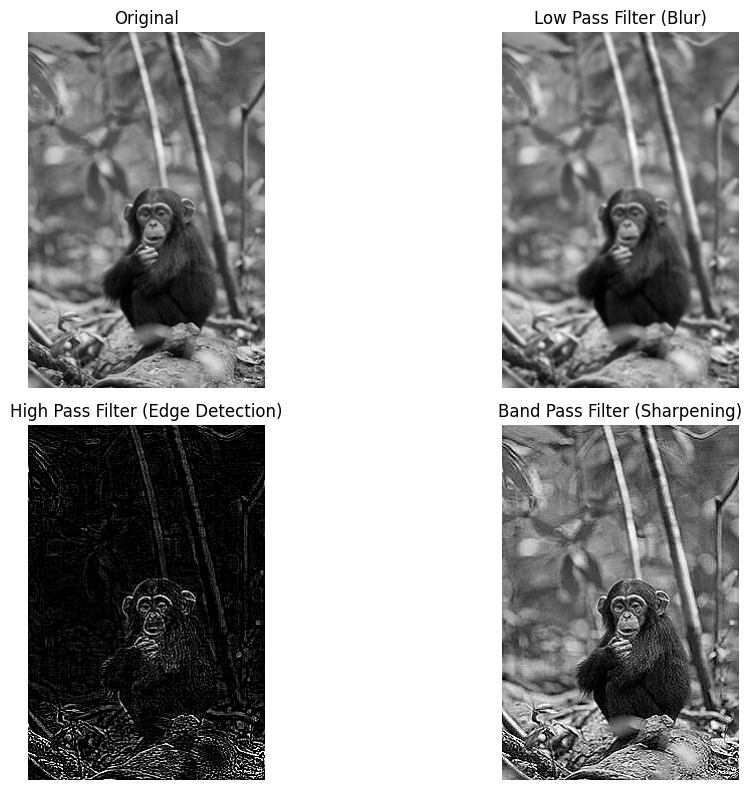

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(gray, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(lpf_result, cmap='gray')
plt.title('Low Pass Filter (Blur)')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(hpf_result, cmap='gray')
plt.title('High Pass Filter (Edge Detection)')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(bpf_result, cmap='gray')
plt.title('Band Pass Filter (Sharpening)')
plt.axis('off')

plt.tight_layout()
plt.show()


**Analisa Nomor 2**

**1. Perbandingan Visual :**
*   *Original* : Gambar asli, kontras dan ketajaman alami. (Penjelasan : Tidak ada perubahan.)
*   *Low Pass Filter (LPF) *: Gambar terlihat lebih halus dan blur. Detail tepi berkurang. (Penjelasan : LPF menekan komponen frekuensi tinggi (noise dan tepi) → hanya frekuensi rendah (area halus) yang dipertahankan.)
*   *High Pass Filter (HPF) *: Gambar menjadi tajam di area tepi, namun gelap di area datar. (Penjelasan : HPF menonjolkan perubahan intensitas cepat → mendeteksi tepi atau batas objek.)
*   *Band Pass Filter (BPF) *: Gambar tampak lebih tajam tanpa terlalu gelap. (Penjelasan : Kombinasi efek LPF dan HPF: mempertahankan detail sedang sambil menonjolkan tepi → cocok untuk sharpening.)


**2. Nilai Piksel Rata-rata**


*  *Original* : (Nilai Rata-Rata : ~120-130)
→ [*Interpretasi* : Intensitas asli.]
*   *LPF* : (Nilai Rata-Rata : Lebih rendah sedikit (~110–120))
→ [*Interpretasi* : Karena blur menurunkan kontras tinggi.]
*   *HPF* : (Nilai Rata-Rata : Sangat rendah (~20–40))
→ [*Interpretasi* : Hanya menyimpan tepi, jadi rata-rata intensitas kecil.]
*   *BPF* : (Nilai Rata-Rata : Hampir sama atau sedikit lebih tinggi dari asli (~130–140))
→ [*Interpretasi* : Menajamkan tepi sambil mempertahankan struktur.]


**3. Hubungan Domain Spasial dan Domain Frekuensi**


*   Domain Spasial : Operasi dilakukan langsung pada nilai piksel menggunakan kernel (konvolusi). Misalnya, menjumlahkan piksel di sekitar untuk mendapatkan nilai baru.
*   Domain Frekuensi : Operasi dilakukan terhadap komponen frekuensi gambar (setelah transformasi Fourier).
    * Frekuensi rendah = area halus, perubahan lambat.
    * Frekuensi tinggi = tepi, detail tajam.
*   Keterkaitan : Filter spasial seperti LPF, HPF, dan BPF sebenarnya mengubah distribusi frekuensi gambar.
    * LPF → melewatkan frekuensi rendah.
    * HPF → melewatkan frekuensi tinggi.
    * BPF → melewatkan frekuensi menengah.
